In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [15]:
import kagglehub

path = kagglehub.dataset_download("jayaantanaath/simulated-dataset-jee-dropout-after-class-12")

print("Path to dataset files:", path)

100%|██████████| 91.5k/91.5k [00:00<00:00, 751kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/jayaantanaath/simulated-dataset-jee-dropout-after-class-12/versions/1


In [16]:
path

'/root/.cache/kagglehub/datasets/jayaantanaath/simulated-dataset-jee-dropout-after-class-12/versions/1'

In [18]:
!ls /root/.cache/kagglehub/datasets/jayaantanaath/simulated-dataset-jee-dropout-after-class-12/versions/1

JEE_Dropout_After_Class_12.csv


In [19]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/jayaantanaath/simulated-dataset-jee-dropout-after-class-12/versions/1/JEE_Dropout_After_Class_12.csv')

In [20]:
df.head()

,jee_main_score,jee_advanced_score,mock_test_score_avg,school_board,class_12_percent,attempt_count,coaching_institute,daily_study_hours,family_income,parent_education,location_type,peer_pressure_level,mental_health_issues,admission_taken,dropout
0,78.95,59.22,59.86,CBSE,70.09,1,FIITJEE,5.4,Low,Upto 10th,Urban,Low,No,No,1
1,70.06,58.75,64.33,State,78.00,1,FIITJEE,5.5,Mid,Upto 10th,Urban,Low,Yes,No,0
2,81.07,37.27,60.83,ICSE,64.36,1,FIITJEE,7.0,Low,PG,Semi-Urban,Medium,Yes,No,1
3,93.32,60.72,69.33,ICSE,73.21,1,FIITJEE,2.1,Low,12th,Semi-Urban,Medium,Yes,Yes,0
4,68.72,77.73,82.37,CBSE,89.02,1,Allen,6.3,Mid,Graduate,Semi-Urban,High,No,Yes,0


In [22]:
le = LabelEncoder()

In [23]:
df['coaching_institute'] = le.fit_transform(df['coaching_institute'])

In [24]:
df.head()

,jee_main_score,jee_advanced_score,mock_test_score_avg,school_board,class_12_percent,attempt_count,coaching_institute,daily_study_hours,family_income,parent_education,location_type,peer_pressure_level,mental_health_issues,admission_taken,dropout
0,78.95,59.22,59.86,CBSE,70.09,1,1,5.4,Low,Upto 10th,Urban,Low,No,No,1
1,70.06,58.75,64.33,State,78.00,1,1,5.5,Mid,Upto 10th,Urban,Low,Yes,No,0
2,81.07,37.27,60.83,ICSE,64.36,1,1,7.0,Low,PG,Semi-Urban,Medium,Yes,No,1
3,93.32,60.72,69.33,ICSE,73.21,1,1,2.1,Low,12th,Semi-Urban,Medium,Yes,Yes,0
4,68.72,77.73,82.37,CBSE,89.02,1,0,6.3,Mid,Graduate,Semi-Urban,High,No,Yes,0


In [25]:
cols_to_encode = ['school_board', 'family_income', 'parent_education', 'location_type', 'peer_pressure_level', 'mental_health_issues', 'admission_taken']

In [26]:
for col in cols_to_encode:
  df[col] = le.fit_transform(df[col])

In [27]:
df.head()

,jee_main_score,jee_advanced_score,mock_test_score_avg,school_board,class_12_percent,attempt_count,coaching_institute,daily_study_hours,family_income,parent_education,location_type,peer_pressure_level,mental_health_issues,admission_taken,dropout
0,78.95,59.22,59.86,0,70.09,1,1,5.4,1,3,2,1,0,0,1
1,70.06,58.75,64.33,2,78.00,1,1,5.5,2,3,2,1,1,0,0
2,81.07,37.27,60.83,1,64.36,1,1,7.0,1,2,1,2,1,0,1
3,93.32,60.72,69.33,1,73.21,1,1,2.1,1,0,1,2,1,1,0
4,68.72,77.73,82.37,0,89.02,1,0,6.3,2,1,1,0,0,1,0


<BarContainer object of 4 artists>

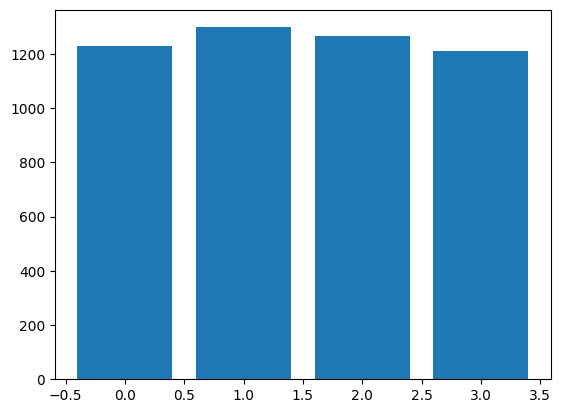

In [30]:
plt.bar(df['coaching_institute'].value_counts().index, df['coaching_institute'].value_counts().values)